In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
sns.set_context("paper", font_scale=1.55)
sns.set_style('ticks', {'font.family': 'Times New Roman'})

These two functions will help me make the plot making code a bit more compact.

In [2]:
class NewFormatter(plt.LogFormatter):
    """
    Subclass Log formatter to pretty print ALL numbers unless they are huge
    """
    def _num_to_string(self, x, vmin, vmax):
        if x > 10000:
            s = '%1.0e' % x
        else:
            s = self._pprint_val(x, vmax - vmin)
        return s

def finalize_plot(ax, log=False, margins=False, **kwargs):
    """
    helper function to finalize a plot
    """
    if kwargs:
        ax.set(**kwargs)
    if log:
        # Formatter instance to use for this ax only
        formatter_x = NewFormatter(labelOnlyBase=False, minor_thresholds=(0.8, 0.5))
        ax.xaxis.set_major_formatter(formatter_x)
        ax.xaxis.set_minor_formatter(formatter_x)
    if not margins:
        ax.margins(x=0)
    #if title is not None:
    #    ax.set_title(title)

In [3]:
visir = pd.read_csv('../Data/VISIR_merged_fluxes_TMP.csv', skipinitialspace=True, na_values=['#NAME?'])

In [4]:
prop = 'Mstar'

labels_x = []
labels_y = []
hist_data = {'Labels':[], prop:[]}

for row in visir.itertuples():
    if not np.isnan(row.flux_x):
        hist_data['Labels'].append('H$_2$O')
        hist_data[prop].append(row.Mstar)
    
    if not np.isnan(row.flux_y):
        hist_data['Labels'].append('Neon[II]')
        hist_data[prop].append(row.Mstar)
    
    if np.isnan(row.flux_x) and np.isnan(row.flux_y):
        hist_data['Labels'].append('Missing')
        hist_data[prop].append(row.Mstar)
    

hist_data = pd.DataFrame(data=hist_data)

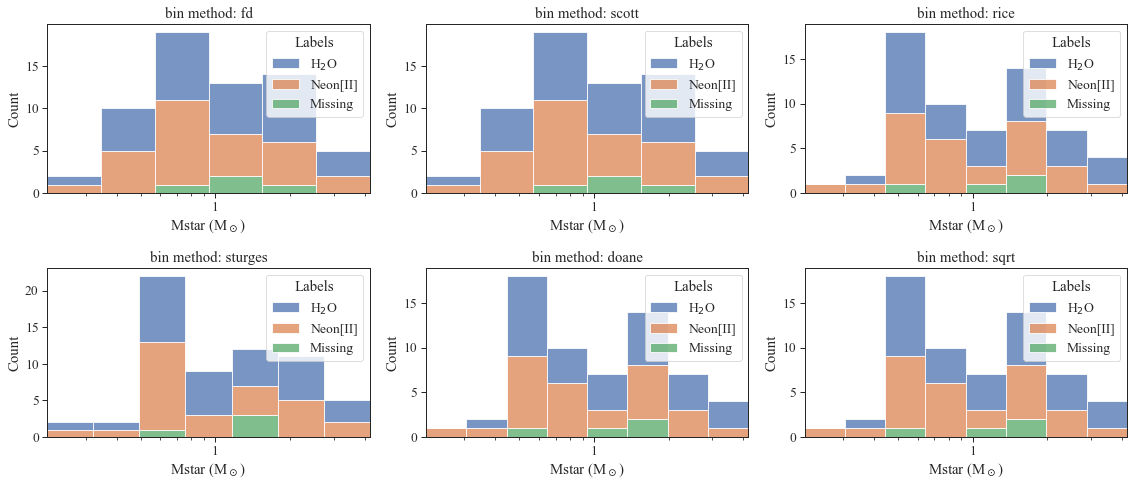

In [5]:
bin_methods = ['fd', 'scott', 'rice', 'sturges', 'doane', 'sqrt']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 7))

for method, ax in zip(bin_methods, axes.flat):
    sns.histplot(data=hist_data, x=prop, hue='Labels', bins=method, kde=False, stat='count', 
                 multiple='stack', log_scale=True, legend=True, ax=ax)

    finalize_plot(ax, log=True, title=f'bin method: {method}', xlabel='Mstar (M$_\odot$)')
    
plt.tight_layout()


In [6]:
prop = 'Lstar'

labels_x = []
labels_y = []
hist_data = {'Labels':[], prop:[]}

for row in visir.itertuples():
    if not np.isnan(row.flux_x):
        hist_data['Labels'].append('H$_2$O')
        hist_data[prop].append(row.Lstar)
    
    if not np.isnan(row.flux_y):
        hist_data['Labels'].append('Neon[II]')
        hist_data[prop].append(row.Lstar)
    
    if np.isnan(row.flux_x) and np.isnan(row.flux_y):
        hist_data['Labels'].append('Missing')
        hist_data[prop].append(row.Lstar)
    
    
hist_data = pd.DataFrame(data=hist_data)

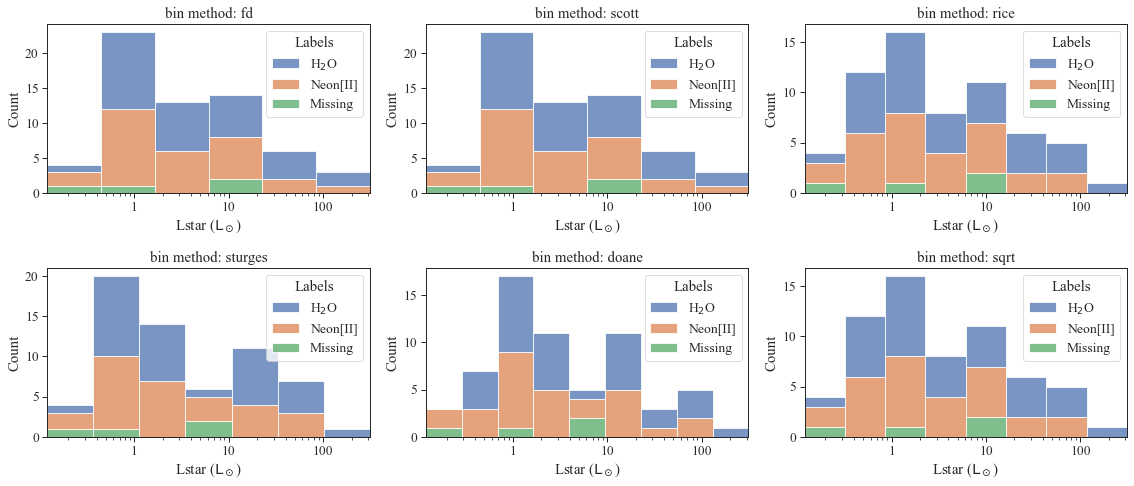

In [7]:
bin_methods = ['fd', 'scott', 'rice', 'sturges', 'doane', 'sqrt']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 7))

for method, ax in zip(bin_methods, axes.flat):
    sns.histplot(data=hist_data, x=prop, hue='Labels', bins=method, kde=False, stat='count', 
                 multiple='stack', log_scale=True, legend=True, ax=ax)

    finalize_plot(ax, log=True, title=f'bin method: {method}', xlabel=r'Lstar ($\mathrm{L_\odot}$)')
    
plt.tight_layout()
